In [1]:
# this is to make the Jupyter notebook as wide as the screen (on the Mac at least)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format ='retina'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import signal as sg
from datetime import datetime as dt
import xarray as xr

In [3]:
def prcrng(x):
    return (np.nanpercentile(x,84) - np.nanpercentile(x,16))/2.

In [4]:
dir_acs = "/users/rsg/spa/spapapers/Pardo_Globlal_Chla/insitu/reprocessing/netCDF/SeaBASS2022/"
fn_acs = "GP505.nc"

In [5]:
# read ACS (and HPLC) data in xr format

acs = xr.open_dataset(dir_acs + fn_acs)

# check keys
print(acs.keys())

#check attributes
acs['acs_chl'].attrs

print(len(acs.hplc_time))
print(len(acs.time))

KeysView(<xarray.Dataset>
Dimensions:         (time: 106, hplc_time: 68, acs_wv: 176)
Coordinates:
  * time            (time) datetime64[ns] 2005-09-01T04:43:00 ... 2005-09-28T...
  * hplc_time       (hplc_time) datetime64[ns] 2005-08-26T23:00:00 ... 2005-0...
  * acs_wv          (acs_wv) float64 400.0 402.0 404.0 ... 746.0 748.0 750.0
Data variables:
    hplc_lat        (hplc_time) float64 ...
    hplc_lon        (hplc_time) float64 ...
    hplc_Tot_Chl_a  (hplc_time) float64 ...
    uway_lat        (time) float64 ...
    uway_lon        (time) float64 ...
    acs_chl         (time) float64 ...
    acs_ap          (time, acs_wv) float64 ...)
68
106


['2005-09-01T04:43:00.000000000' '2005-09-01T06:30:00.000000000'
 '2005-09-01T23:22:00.000000000' '2005-09-02T01:14:00.000000000'
 '2005-09-02T15:33:00.000000000' '2005-09-02T16:40:00.000000000'
 '2005-09-02T17:50:00.000000000' '2005-09-02T19:45:00.000000000'
 '2005-09-02T22:25:00.000000000' '2005-09-03T16:22:00.000000000'
 '2005-09-03T16:47:00.000000000' '2005-09-03T18:20:00.000000000'
 '2005-09-03T19:40:00.000000000' '2005-09-04T14:30:00.000000000'
 '2005-09-04T15:20:00.000000000' '2005-09-04T18:05:00.000000000'
 '2005-09-04T18:25:00.000000000' '2005-09-04T19:30:00.000000000'
 '2005-09-04T20:15:00.000000000' '2005-09-04T22:40:00.000000000'
 '2005-09-04T23:05:00.000000000' '2005-09-05T16:18:00.000000000'
 '2005-09-05T16:40:00.000000000' '2005-09-05T17:30:00.000000000'
 '2005-09-05T18:35:00.000000000' '2005-09-05T20:10:00.000000000'
 '2005-09-05T20:35:00.000000000' '2005-09-05T21:30:00.000000000'
 '2005-09-05T22:20:00.000000000' '2005-09-06T15:33:00.000000000'
 '2005-09-06T16:30:00.000

Text(0, 0.5, 'lon')

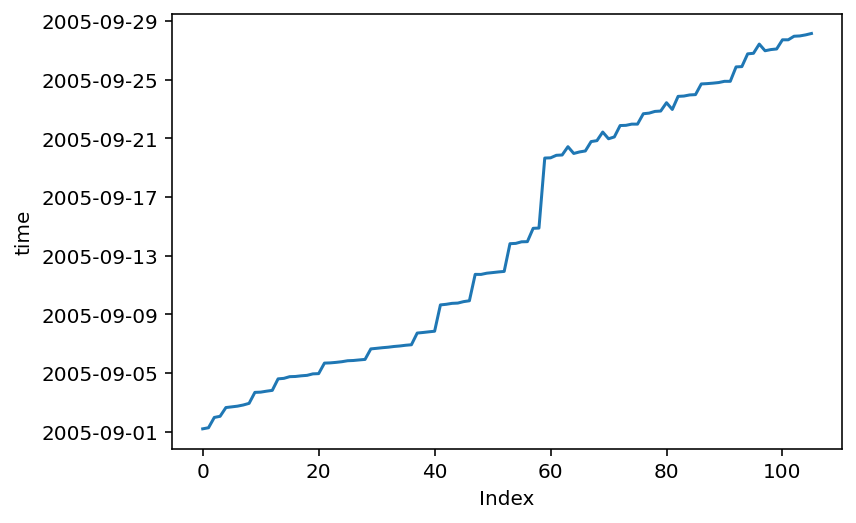

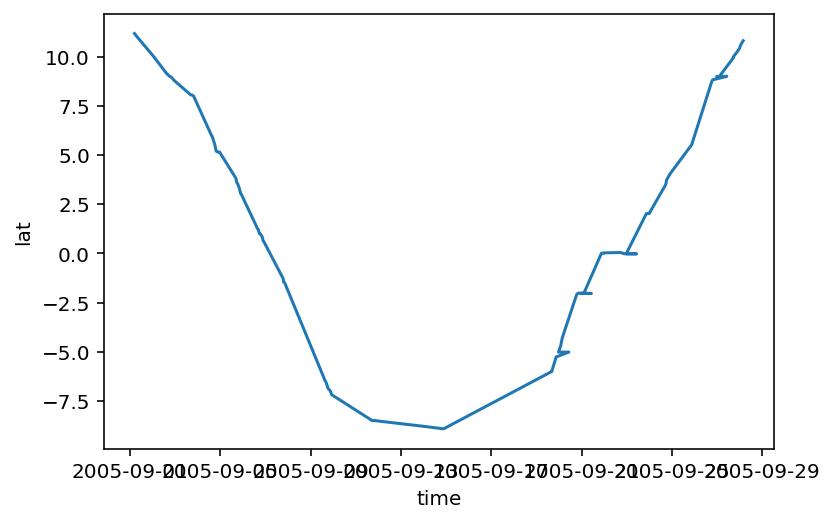

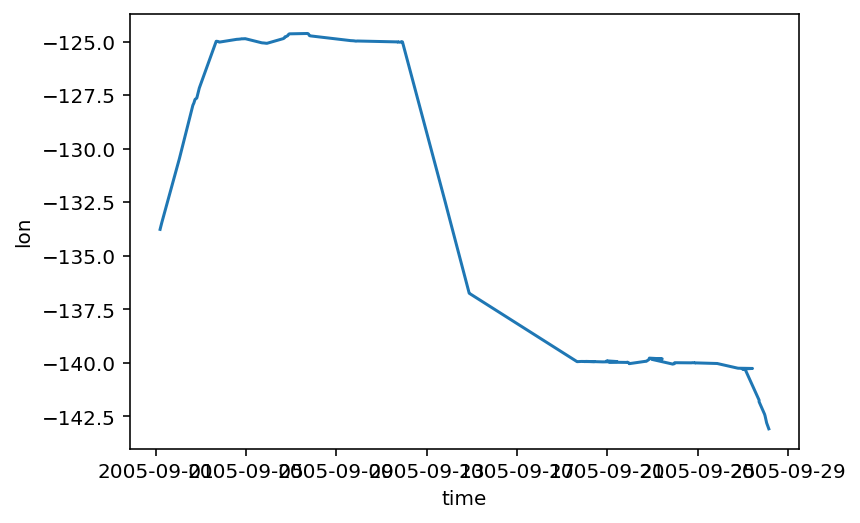

In [6]:
# test plot of lat & lons versus time
plt.figure()
plt.plot(acs.time)
plt.xlabel('Index')
plt.ylabel('time')
print(acs.time.values)


plt.figure()
plt.plot(acs.time,acs.uway_lat)
plt.xlabel('time')
plt.ylabel('lat')

plt.figure()
plt.plot(acs.time,acs.uway_lon)
plt.xlabel('time')
plt.ylabel('lon')

# note - data is too patchy for median fillter - maybe there was already some kind of gridding?


In [7]:
# check temporal sample rate
plt.figure()
delta_t = np.median(np.diff(acs.time))
print(delta_t)
print(str(int(delta_t/10**9)) + ' secs')

4200000000000 nanoseconds
4200 secs


<Figure size 432x288 with 0 Axes>

['hplc_lat', 'hplc_lon', 'hplc_Tot_Chl_a', 'uway_lat', 'uway_lon', 'acs_chl', 'acs_ap']


/tmp/ipykernel_792275/1770184987.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax2.semilogy(acs.time, sg.medfilt(acs.acs_chl*(0.72), kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', color='red', alpha = 0.5, label='AC9: adjusted')


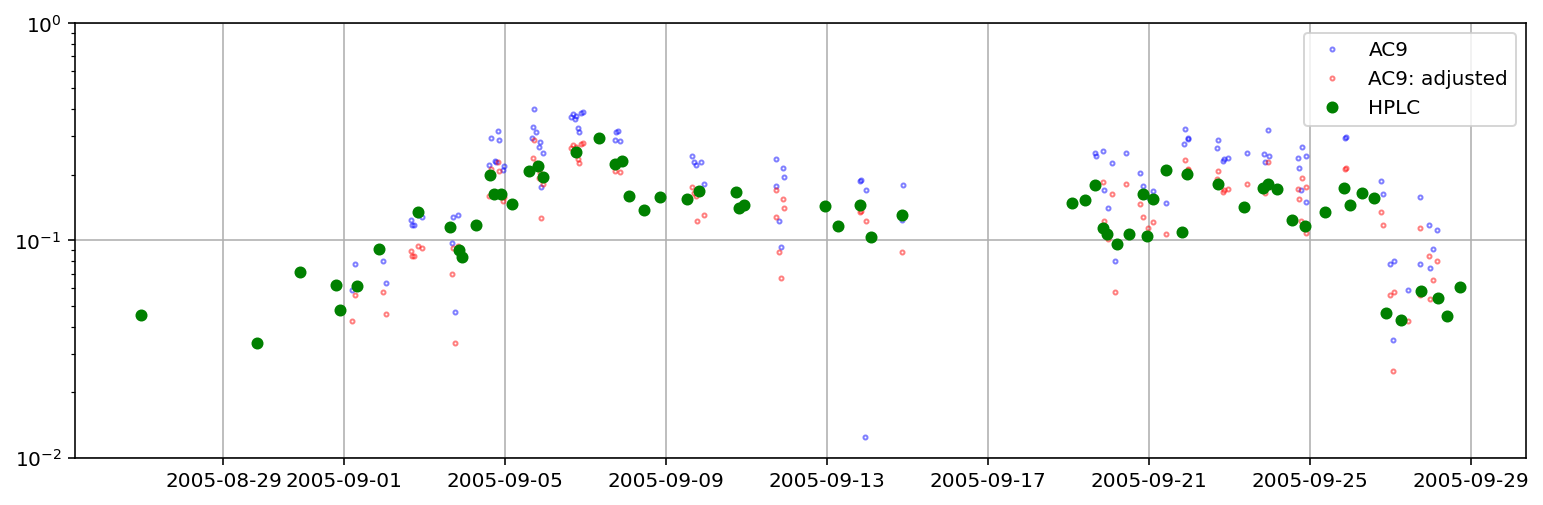

In [8]:
# Test plot of ACS(9) and HPLC Chl prior to match-up
# include emprical adjustment of AC9 chl using AMT
MEDFILT_WIN = 1 # window length of med filter in minutes - note: this assumes data has been binned at 1 minute. In this case 

#
fig2, ax2 = plt.subplots(1, figsize=(13, 4))
ax2.semilogy(acs.time, sg.medfilt(acs.acs_chl, kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', alpha = 0.5, label='AC9')
ax2.semilogy(acs.time, sg.medfilt(acs.acs_chl*(0.72), kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', color='red', alpha = 0.5, label='AC9: adjusted')
ax2.grid('on')
plt.legend()
plt.ylim([1e-2, 1])


print(list(acs.keys()))
ax2.semilogy(acs.hplc_time, acs.hplc_Tot_Chl_a, 'go', ms=5, alpha=1, label='HPLC')#, mfc='none')
#a2.semilogy(df_CTD.index, df_CTD.Tot_Chl_a, 'ko', ms=7, alpha=1, mfc='none', zorder=60)
#ax2.scatter(df_CTD.index, df_CTD.Tot_Chl_a, c=df_CTD.Bottle.values, s=30, alpha=1, zorder=60, cmap = plt.get_cmap('inferno'), vmin=2, vmax=24)
#ax2.semilogy(df_UND.index, df_UND.Tot_Chl_a, 'ks', ms=7, alpha=0.85, mfc='c')
plt.legend()
#########


In [9]:
# Empirical adjustment from AMT is closet to HPLC - correct chl as follows:
acs.acs_chl.values = 0.72*acs.acs_chl.values 

106


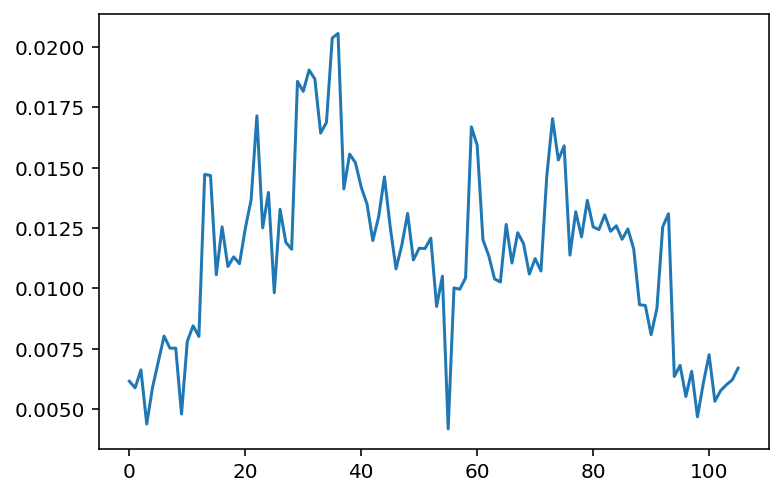

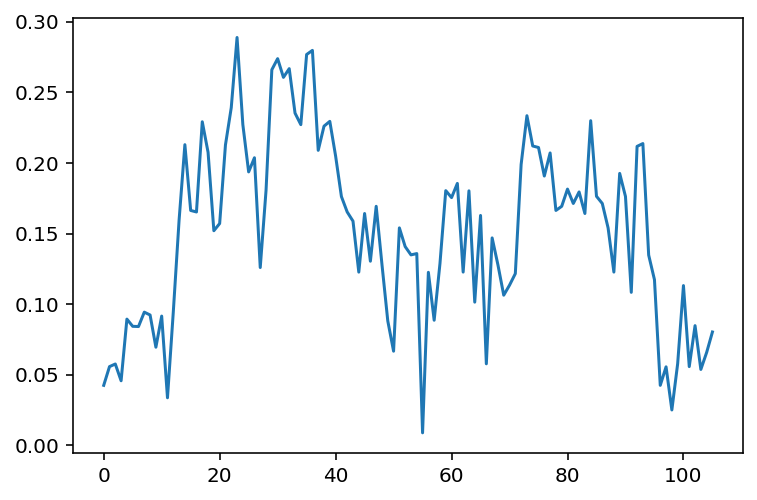

In [10]:
# df_hplc_surf = df_hplc_surf
# merge HPCL and ACS data
# see https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate
# here made with dataframe instead of series

# averages duplicate values
#df_hplc_surf = df_hplc_surf.groupby('time').mean() 

#step x - # filters w.r.t. i2fn (mQ interval + previous manual spike removal) and innan
#plt.figure()
#acs['acs_chl'].values = sg.medfilt(acs.acs_chl, kernel_size = MEDFILT_WIN) # apply med filter to acx chl and acx chl debiasesd 
#plt.plot(acs['acs_chl'].values)

#step y - # filters w.r.t. ap (10the element) being > 0
plt.plot(acs.acs_ap[:,10]) # all data passes QC - there were issues due to non-unique elemnts, but it does matter
#i2kp = np.where((acs.acs_ap[:,10] > 0)) [0]
#iy = xr.DataArray(acs.time[i2kp], dims=['time']) 
#acs = acs.sel(time = iy)

#step z - # filters w.r.t. acs chl being > 0
plt.figure()
plt.plot(acs['acs_chl'].values) # all data passes QC - ther were issues due to non-unique elemnts, but it does matter
#i2kp = np.where((acs.acs_ap[:,10] > 0)) [0]) [0]
#iz = xr.DataArray(acs_filtered_xy.time[i2kp], dims=['time']) 
#acs_filtered_xyz = acs_filtered_xy.sel(time = iz)
#plt.plot(acs_filtered_xyz['acs_chl'].values)


print(len(acs['acs_chl'].values))

In [11]:
# match-ups #
# create serier objects
df_hplc = pd.Series(acs['hplc_Tot_Chl_a'].values ,index = acs.hplc_time)
df_acs = pd.Series(acs['acs_chl'].values, index = acs.time)

# filter
df_hplc = df_hplc.groupby(df_hplc.index).mean() 
df_acs = df_acs.groupby(df_acs.index).mean() 

df_hplc_acs = pd.DataFrame({'Tot_Chl_a': df_hplc, 'acs_chl': df_acs})
#df_hplc_acs = df_hplc_acs.interpolate('index',limit=1).reindex(df_hplc_acs.index,method='nearest',tolerance='30min')
df_hplc_acs = df_hplc_acs.interpolate('index').reindex(df_hplc.index,method='nearest',tolerance='30min') 

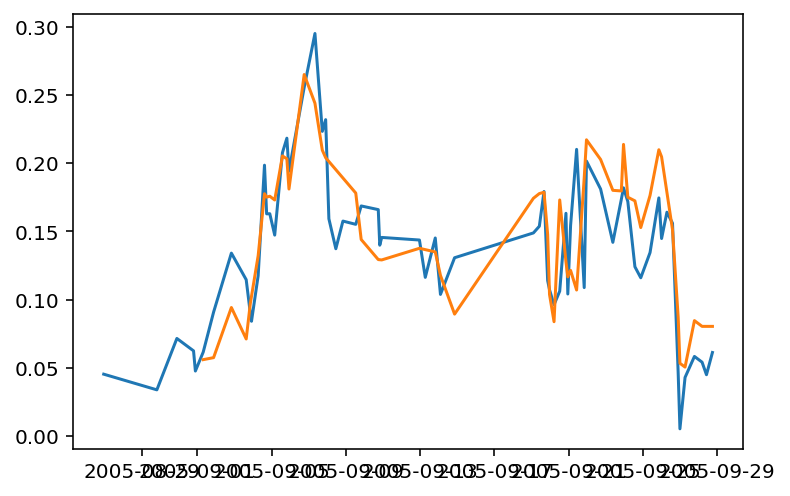

In [12]:
plt.figure()
plt.plot(df_hplc_acs)


In [13]:
#df_hplc_surf_new = df_hplc_surf
# merge HPCL and ACS data
# see https://stackoverflow.com/questions/26517125/combine-two-pandas-dataframes-resample-on-one-time-column-interpolate
# here made with dataframe instead of series

# averages duplicate values
#df_hplc_surf_new = df_hplc_surf_new.groupby('time').mean() 

# create pandas series with medfilt ACS data
#df_acs = pd.Series(sg.medfilt(acs.acs_chl[i2f][innan], kernel_size=31), index = acs.time.values[i2f][innan])
#df_hplc_acs = pd.DataFrame({'Tot_Chl_a': df_hplc_surf_new.Tot_Chl_a, 'acs_chl': df_acs})
#df_hplc_acs = df_hplc_acs.interpolate('index').reindex(df_hplc_surf_new.index)
    


0.08503581465060517 0.22694868478876618 63
-0.0465646788816404 0.10957554096898 63


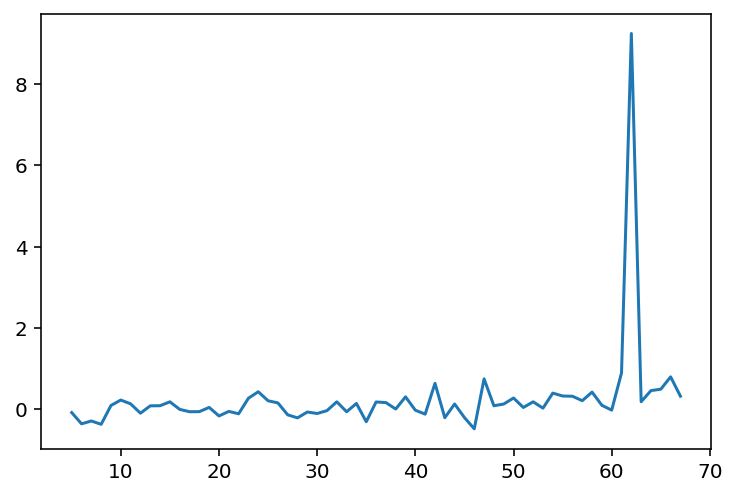

In [14]:
# compute residuals and stats (lin and log space)
rres = df_hplc_acs.acs_chl.values / df_hplc_acs.Tot_Chl_a.values - 1
rres = df_hplc_acs.acs_chl.values / df_hplc_acs.Tot_Chl_a.values - 1 # with empircal adjustment


rres_log = np.log10(df_hplc_acs.acs_chl.values) / np.log10(df_hplc_acs.Tot_Chl_a.values) - 1
rres_log = np.log10(df_hplc_acs.acs_chl.values) / np.log10(df_hplc_acs.Tot_Chl_a.values) - 1

delta = np.nanmedian(rres)
delta_log = np.nanmedian(rres_log)
sigma = prcrng(rres)
sigma_log = prcrng(rres_log)
N = np.sum(~np.isnan(rres))

print(delta, sigma, N)

print(delta_log, sigma_log, N)

plt.figure()
plt.plot(rres)

In [15]:

print(rres)

[            nan             nan             nan             nan
             nan -9.01891711e-02 -3.67620318e-01 -2.97514570e-01
 -3.79407332e-01  8.50358147e-02  2.18218798e-01  1.24789088e-01
 -1.05448024e-01  7.53111996e-02  7.86483375e-02  1.74879887e-01
 -1.15616592e-02 -6.94767660e-02 -6.74412460e-02  3.67382563e-02
 -1.73309101e-01 -6.17412205e-02 -1.20408434e-01  2.63654586e-01
  4.22459160e-01  2.00482633e-01  1.47853711e-01 -1.45918388e-01
 -2.20788547e-01 -7.62051672e-02 -1.13377213e-01 -4.22799231e-02
  1.74999957e-01 -7.03436098e-02  1.34259005e-01 -3.16432139e-01
  1.70703999e-01  1.55876065e-01 -3.22266771e-03  2.97258434e-01
 -3.21272961e-02 -1.29204939e-01  6.29873025e-01 -2.17027998e-01
  1.20958085e-01 -2.13121336e-01 -4.90856197e-01  7.39374612e-01
  7.74228336e-02  1.19701895e-01  2.68645954e-01  3.50969889e-02
  1.74977913e-01  1.85608472e-02  3.89417142e-01  3.17610852e-01
  3.11786188e-01  2.02275955e-01  4.13692310e-01  8.83120071e-02
 -3.02369261e-02  8.87756

In [16]:
plt.figure()
plt.plot(np.log10(acs.acs_chl[i2f][innan]))



NameError: name 'i2f' is not defined

<Figure size 432x288 with 0 Axes>

<xarray.DataArray 'time' (time: 106)>
array(['2005-09-01T04:43:00.000000000', '2005-09-01T06:30:00.000000000',
       '2005-09-01T23:22:00.000000000', '2005-09-02T01:14:00.000000000',
       '2005-09-02T15:33:00.000000000', '2005-09-02T16:40:00.000000000',
       '2005-09-02T17:50:00.000000000', '2005-09-02T19:45:00.000000000',
       '2005-09-02T22:25:00.000000000', '2005-09-03T16:22:00.000000000',
       '2005-09-03T16:47:00.000000000', '2005-09-03T18:20:00.000000000',
       '2005-09-03T19:40:00.000000000', '2005-09-04T14:30:00.000000000',
       '2005-09-04T15:20:00.000000000', '2005-09-04T18:05:00.000000000',
       '2005-09-04T18:25:00.000000000', '2005-09-04T19:30:00.000000000',
       '2005-09-04T20:15:00.000000000', '2005-09-04T22:40:00.000000000',
       '2005-09-04T23:05:00.000000000', '2005-09-05T16:18:00.000000000',
       '2005-09-05T16:40:00.000000000', '2005-09-05T17:30:00.000000000',
       '2005-09-05T18:35:00.000000000', '2005-09-05T20:10:00.000000000',
       '2005-09-05T20:35:00.000000000', '2005-09-05T21:30:00.000000000',
       '2005-09-05T22:20:00.000000000', '2005-09-06T15:33:00.000000000',
       '2005-09-06T16:30:00.000000000', '2005-09-06T17:30:00.000000000',
       '2005-09-06T18:20:00.000000000', '2005-09-06T19:30:00.000000000',
       '2005-09-06T20:20:00.000000000', '2005-09-06T21:30:00.000000000',
       '2005-09-06T22:20:00.000000000', '2005-09-07T17:29:00.000000000',
       '2005-09-07T18:24:00.000000000', '2005-09-07T19:29:00.000000000',
       '2005-09-07T20:29:00.000000000', '2005-09-09T15:33:00.000000000',
       '2005-09-09T16:33:00.000000000', '2005-09-09T18:05:00.000000000',
       '2005-09-09T18:33:00.000000000', '2005-09-09T20:55:00.000000000',
       '2005-09-09T22:20:00.000000000', '2005-09-11T17:32:00.000000000',
       '2005-09-11T17:27:00.000000000', '2005-09-11T19:27:00.000000000',
       '2005-09-11T20:27:00.000000000', '2005-09-11T21:30:00.000000000',
       '2005-09-11T22:22:00.000000000', '2005-09-13T19:45:00.000000000',
       '2005-09-13T20:15:00.000000000', '2005-09-13T22:50:00.000000000',
       '2005-09-13T23:05:00.000000000', '2005-09-14T20:54:00.000000000',
       '2005-09-14T21:19:00.000000000', '2005-09-19T15:56:00.000000000',
       '2005-09-19T16:16:00.000000000', '2005-09-19T20:26:00.000000000',
       '2005-09-19T20:56:00.000000000', '2005-09-20T10:31:00.000000000',
       '2005-09-19T23:26:00.000000000', '2005-09-20T01:56:00.000000000',
       '2005-09-20T03:31:00.000000000', '2005-09-20T18:54:00.000000000',
       '2005-09-20T20:24:00.000000000', '2005-09-21T10:29:00.000000000',
       '2005-09-20T23:29:00.000000000', '2005-09-21T02:29:00.000000000',
       '2005-09-21T21:07:00.000000000', '2005-09-21T21:27:00.000000000',
       '2005-09-21T23:27:00.000000000', '2005-09-21T23:27:00.000000000',
       '2005-09-22T16:27:00.000000000', '2005-09-22T17:27:00.000000000',
       '2005-09-22T20:15:00.000000000', '2005-09-22T20:52:00.000000000',
       '2005-09-23T10:30:00.000000000', '2005-09-22T23:27:00.000000000',
       '2005-09-23T20:52:00.000000000', '2005-09-23T21:24:00.000000000',
       '2005-09-23T23:14:00.000000000', '2005-09-23T23:44:00.000000000',
       '2005-09-24T17:13:00.000000000', '2005-09-24T17:45:00.000000000',
       '2005-09-24T18:30:00.000000000', '2005-09-24T19:30:00.000000000',
       '2005-09-24T21:30:00.000000000', '2005-09-24T21:30:00.000000000',
       '2005-09-25T21:06:00.000000000', '2005-09-25T21:36:00.000000000',
       '2005-09-26T18:28:00.000000000', '2005-09-26T19:23:00.000000000',
       '2005-09-27T10:28:00.000000000', '2005-09-26T23:33:00.000000000',
       '2005-09-27T01:28:00.000000000', '2005-09-27T02:28:00.000000000',
       '2005-09-27T17:28:00.000000000', '2005-09-27T17:28:00.000000000',
       '2005-09-27T23:18:00.000000000', '2005-09-27T23:48:00.000000000',
       '2005-09-28T01:31:00.000000000', '2005-09-28T03:48:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2005-09-01T04:

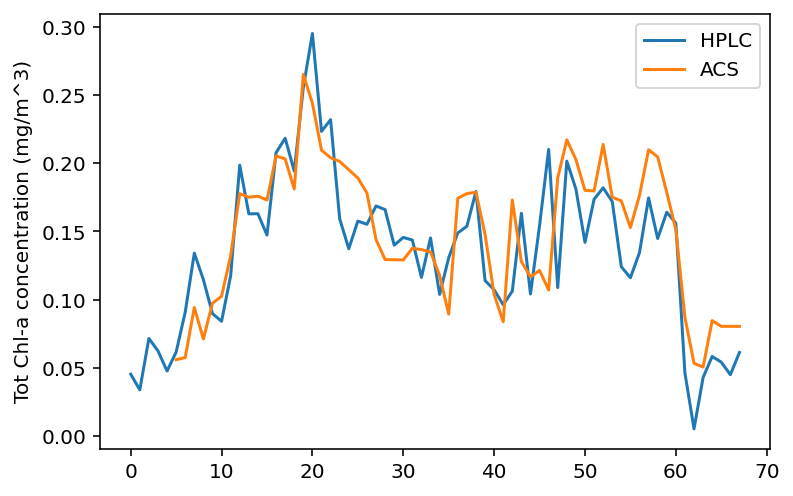

In [17]:
plt.figure()
plt.plot(df_hplc_acs.Tot_Chl_a.values,label='HPLC')
plt.plot(df_hplc_acs.acs_chl.values,label='ACS')
plt.ylabel('Tot Chl-a concentration (mg/m^3)')
#plt.xlabel('Sample index')
plt.legend()

acs.time



['hplc_lat', 'hplc_lon', 'hplc_Tot_Chl_a', 'uway_lat', 'uway_lon', 'acs_chl', 'acs_ap']


/tmp/ipykernel_792275/3004970402.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  ax2.semilogy(df_hplc.index, df_hplc.values, 'go', ms=5, color='green', alpha=1, label='HPLC_all')#, mfc='none')
/tmp/ipykernel_792275/3004970402.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  ax2.semilogy(df_hplc_acs.index[~np.isnan(rres)==1], df_hplc_acs.Tot_Chl_a[~np.isnan(rres)==1], 'go', ms=5, color='red', alpha=1, label='HPLC matches')#, mfc='none')


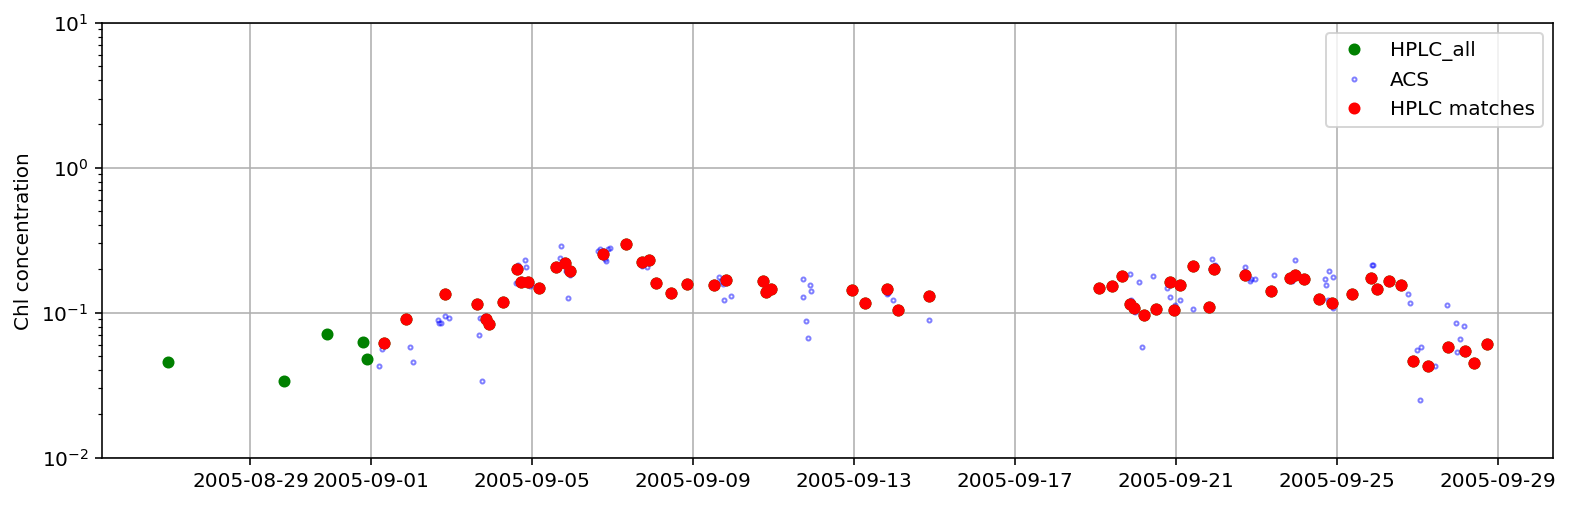

In [18]:
MEDFILT_WIN = 1 # window length of med filter in minutes 

#
fig2, ax2 = plt.subplots(1, figsize=(13, 4))
ax2.semilogy(df_hplc.index, df_hplc.values, 'go', ms=5, color='green', alpha=1, label='HPLC_all')#, mfc='none')
ax2.semilogy(acs.time, sg.medfilt(acs.acs_chl, kernel_size=MEDFILT_WIN), 'bo', lw=1, ms=2, mfc='none', alpha = 0.5, label='ACS')
ax2.grid('on')
plt.legend()
plt.ylim([1e-2, 10])
plt.ylabel('Chl concentration')

print(list(acs.keys()))
ax2.semilogy(df_hplc_acs.index[~np.isnan(rres)==1], df_hplc_acs.Tot_Chl_a[~np.isnan(rres)==1], 'go', ms=5, color='red', alpha=1, label='HPLC matches')#, mfc='none')
plt.legend()
#########



[0.0453 0.0338 0.0715 0.0624 0.0476 0.0615 0.0908 0.1341 0.1146 0.0897
 0.0841 0.1175 0.1986 0.1629 0.163  0.1473 0.2078 0.2184 0.1942 0.2557
 0.2952 0.2234 0.232  0.1593 0.1373 0.1576 0.1552 0.1687 0.166  0.1399
 0.1456 0.1437 0.1163 0.1452 0.1038 0.1307 0.1489 0.1538 0.1793 0.114
 0.1072 0.0962 0.1062 0.1633 0.1041 0.1543 0.2102 0.1088 0.2016 0.1811
 0.142  0.1736 0.182  0.1719 0.1241 0.116  0.1345 0.1746 0.1448 0.1641
 0.156  0.0461 0.0052 0.0429 0.0583 0.0541 0.0449 0.0612]


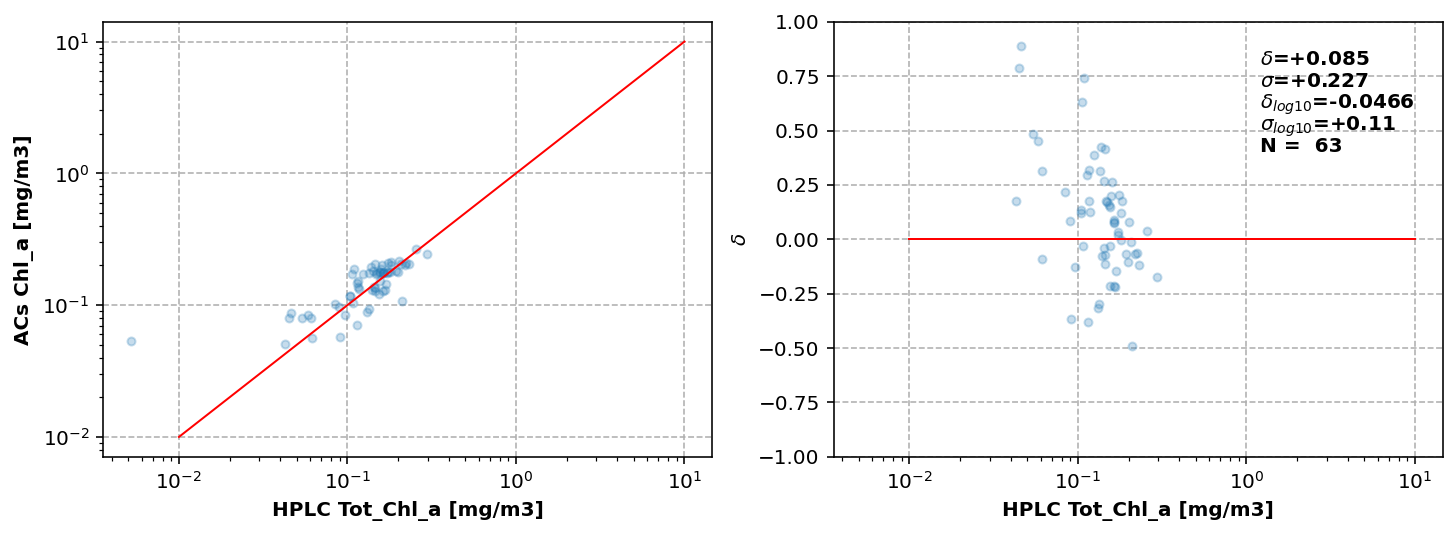

In [19]:


fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].loglog(df_hplc_acs.Tot_Chl_a.values, df_hplc_acs.acs_chl.values, 'o', ms=4, alpha=0.25)
x = np.logspace(np.log10(0.01), np.log10(10), 100)
ax[0].loglog(x, x, 'r-', lw=1)
ax[0].grid('on', ls='--')
ax[0].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
ax[0].set_ylabel('ACs Chl_a [mg/m3]', fontweight='bold')

ax[1].semilogx(df_hplc_acs.Tot_Chl_a.values, rres, 'o', ms=4, alpha=0.25)
ax[1].semilogx(x, x*0, 'r-', lw=1)
ax[1].grid('on', ls='--')
ax[1].set_xlabel('HPLC Tot_Chl_a [mg/m3]', fontweight='bold')
ax[1].set_ylabel('$\delta$', fontweight='bold')
ax[1].set_ylim([-1, 1])
ax[1].text(1.2, 0.8, r'$\delta$='+f'{delta:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.7, r'$\sigma$='+f'{sigma:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.6, r'$\delta_{log10}$='+f'{delta_log:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.5, r'$\sigma_{log10}$='+f'{sigma_log:+0.3}', fontweight='bold')
ax[1].text(1.2, 0.4, f'N = {N: 0}', fontweight='bold')




print(df_hplc_acs.Tot_Chl_a.values)



(-1.0, 1.0)

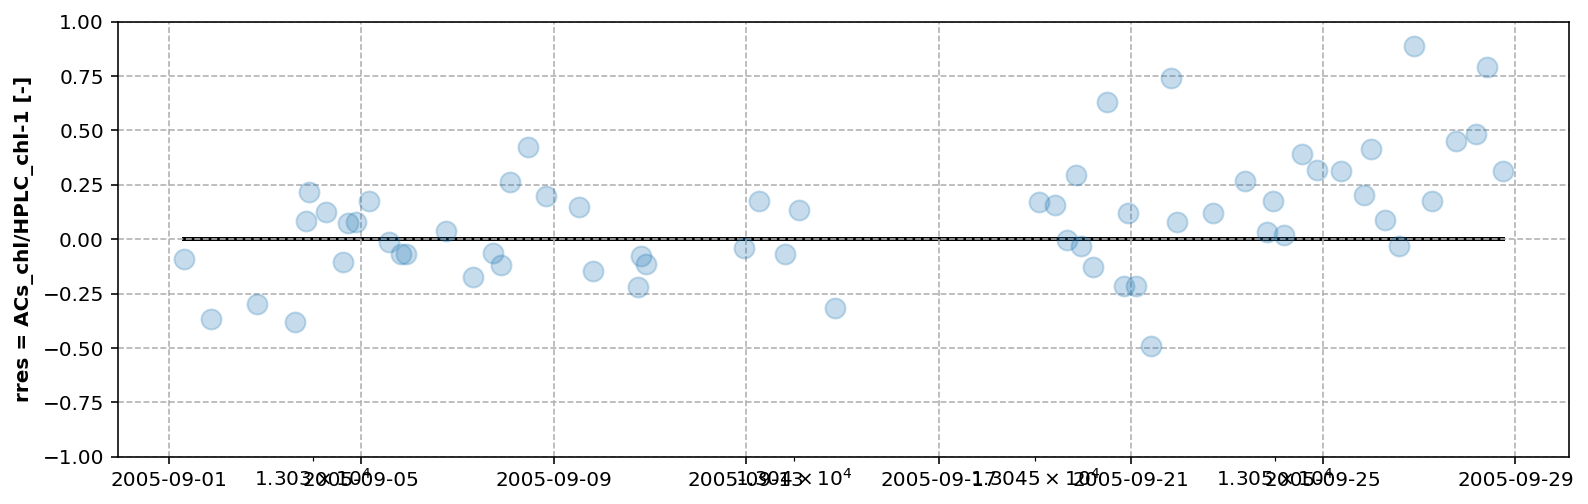

In [20]:
fig, ax = plt.subplots(1,1, figsize=(13, 4))
ax.semilogx(df_hplc_acs.index.values, rres, 'o', ms=10, alpha=0.25, zorder=60)
ax.plot(df_hplc_acs.index.values, rres*0, 'k-', lw=2, zorder=1)
ax.set_ylabel('rres = ACs_chl/HPLC_chl-1 [-]', fontweight='bold')
ax.grid('on', ls='--')
ax.set_ylim([-1, 1])

In [21]:
# as previous but apply log transform prior to fitting
import scipy

linear_mod = scipy.stats.linregress(np.log10(0.014*0.72*df_hplc_acs.acs_chl.values[np.isnan(df_hplc_acs.acs_chl)==0]), np.log10(df_hplc_acs.Tot_Chl_a.values[np.isnan(df_hplc_acs.acs_chl)==0]))


A = np.round(100*linear_mod.intercept)/100
B = np.round(1000*linear_mod.slope)/1000
r_sq = np.round(1000*linear_mod.rvalue**2)/100

r_sq = np.round(1000*linear_mod.rvalue**2)/1000
stderr = np.round(1000*linear_mod.stderr)/1000
interr = np.round(1000*linear_mod.intercept_stderr)/1000


print('A = ' + str(10**A) + ' +/- ' + str(2*10**interr))
print('B = ' + str(B) + ' +/- ' + str(2*stderr))

print(r_sq)


A = 186.20871366628674 +/- 4.426189419211275
B = 1.112 +/- 0.242
0.582


In [22]:
# de-bias ACS-chl following eq 3 in Graban et al., 2020 (https://doi.org/10.1364/OE.397863)
acs['acs_chl_debiased_nomedfilt'] = acs.acs_chl*(1-delta)
# acs_out = pd.DataFrame(data = {'lat [degN]': acs.uway_lat[i2f][innan],
#                              'lon [degE]': acs.uway_lon[i2f][innan],
#                             'acs_chl_debiased [mg_m3]': acs.acs_chl_debiased[i2f][innan]
#                           }  ,
# index = acs.time.values[i2f][innan])

In [23]:
# de-bias ACS-chl following eq 3 in Graban et al., 2020 (https://doi.org/10.1364/OE.397863)
# add attributes to acs_chl_debiased #
acs.acs_chl_debiased_nomedfilt.attrs["debiasing_equation"] = "acs.acs_chl_debiased = acs.acs_chl*(1-delta)"
acs.acs_chl_debiased_nomedfilt.attrs["delta"] = delta
acs.acs_chl_debiased_nomedfilt.attrs["sigma"] = sigma
acs.acs_chl_debiased_nomedfilt.attrs["units"] = "mg/m3"
acs.acs_chl_debiased_nomedfilt.attrs["comments"] = "delta=np.nanmedian(rres), sigma=prcrng(rres), rres=acs_chl/HPLC_Tot_Chl_a-1, based on surface data"
acs.acs_chl_debiased_nomedfilt.attrs["HPLC_Tot_chla"] = df_hplc_acs.Tot_Chl_a[~np.isnan(rres)==1].values  # filter nans
acs.acs_chl_debiased_nomedfilt.attrs["HPLC_Tot_chla_units"] = "mg/m3"
acs.acs_chl_debiased_nomedfilt.attrs["acs_chl"] = df_hplc_acs[~np.isnan(rres)==1].acs_chl.values # filter nans
acs.acs_chl_debiased_nomedfilt.attrs["acs_chl_units"] = "mg/m3"
acs.acs_chl_debiased_nomedfilt.attrs["processed_on"] = dt.now().strftime("%Y-%m-%d %H:%M:%S.%f")
acs.acs_chl_debiased_nomedfilt.attrs["match_up_dates"] = df_hplc_acs[~np.isnan(rres)==1].index.format()

In [25]:

len(acs.acs_chl_debiased_nomedfilt.attrs["match_up_dates"])
len(acs.acs_chl_debiased_nomedfilt.attrs["HPLC_Tot_chla"])

63

In [26]:
print('max/min conc range for results table')
print(np.min(acs.acs_chl_debiased_nomedfilt.attrs["HPLC_Tot_chla"]))
print(np.max(acs.acs_chl_debiased_nomedfilt.attrs["HPLC_Tot_chla"])) # quote min max of match-ups 


max/min conc range for results table
0.0052
0.2952


In [27]:
# save updated NetCDF file
dir_acs_out = '/data/datasets/cruise_data/active/ACS_Chl/Glob_OC_matchups/Debiased_nc/'
acs.to_netcdf(dir_acs_out + fn_acs[:-3] + '_with_debiased_chl.nc')
acs.close()